# **Beverage Sales [Clustering]**

## Import Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

## Loading Dataset

In [80]:
df = pd.read_csv('dataset\Dataset_clustering.csv')

## Exploratory Data Analysis (EDA)

### Identify Data Stucture

In [81]:
df

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16
...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD453552,CUS4736,B2B,Havana Club,Alcoholic Beverages,30.09,99,0.15,2532.07,Sachsen-Anhalt,2023-03-04
9996,ORD281754,CUS7925,B2B,Riesling,Alcoholic Beverages,5.20,56,0.10,262.08,Rheinland-Pfalz,2023-08-31
9997,ORD994,CUS5581,B2C,Fritz-Kola,Soft Drinks,2.05,14,0.00,28.70,Berlin,2022-10-22
9998,ORD2316241,CUS7457,B2C,Mango Juice,Juices,3.31,13,0.00,43.03,Bremen,2023-07-11


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.5+ KB


### Identify Missing Value

In [83]:
df.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

There is no any missing value

### Distribution and Correlation Analysis & Visualization

In [84]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.876568,22.787500,0.029495,135.385663
std,15.093122,26.569801,0.044710,528.922868
min,0.330000,1.000000,0.000000,0.350000
25%,1.050000,6.000000,0.000000,8.300000
50%,1.750000,11.000000,0.000000,20.700000
75%,3.190000,29.000000,0.050000,67.842500
max,138.720000,100.000000,0.150000,10111.960000


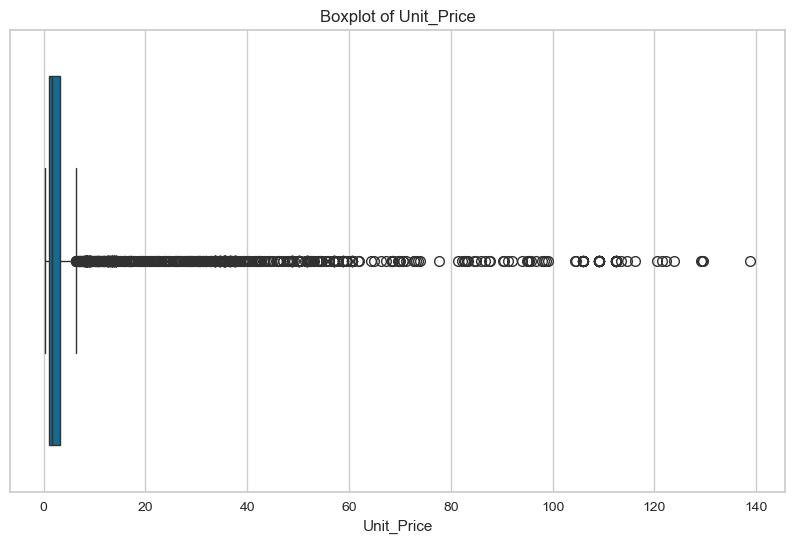

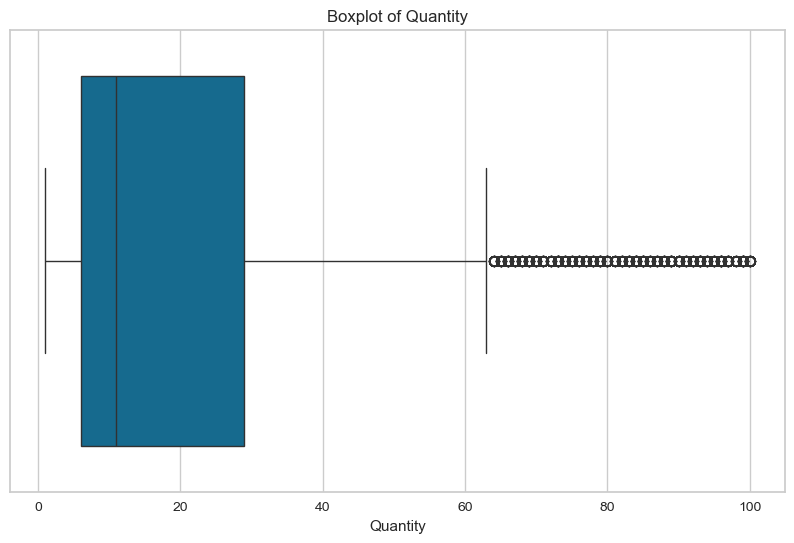

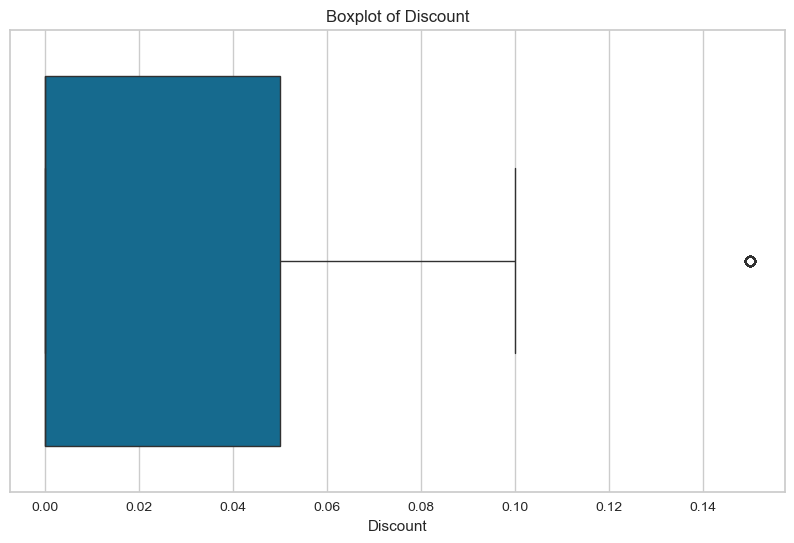

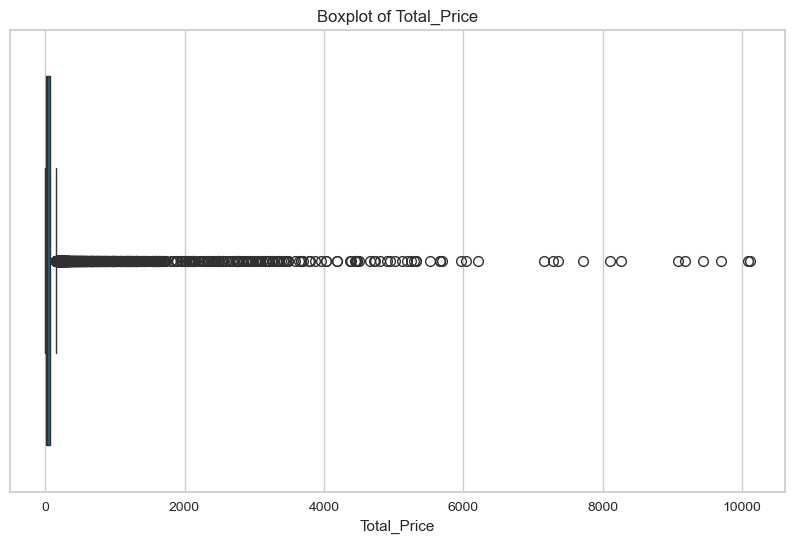

In [85]:
# Boxplot for Numerical Columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

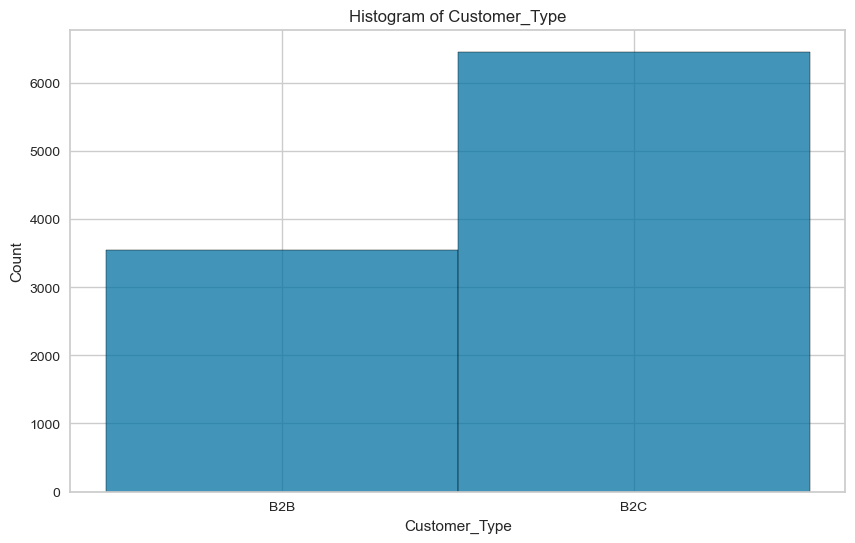

In [86]:
# Histogram for Customer_Type Columns
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Type'])
plt.title('Histogram of Customer_Type')
plt.show()

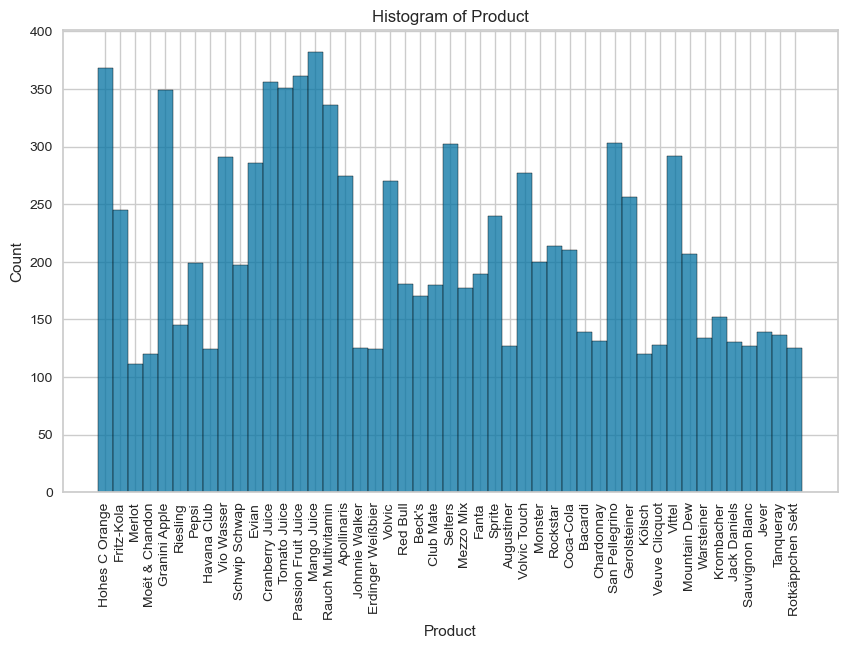

In [87]:
# Histogram for Product Columns
plt.figure(figsize=(10, 6))
sns.histplot(df['Product'])
plt.title('Histogram of Product')
plt.xticks(rotation=90)
plt.show()

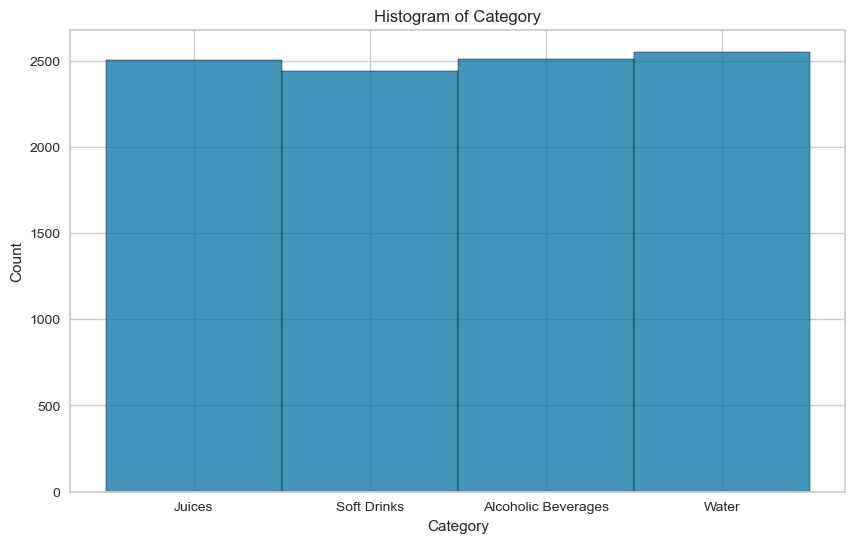

In [88]:
# Histogram for Category Columns
plt.figure(figsize=(10, 6))
sns.histplot(df['Category'])
plt.title('Histogram of Category')
plt.show()

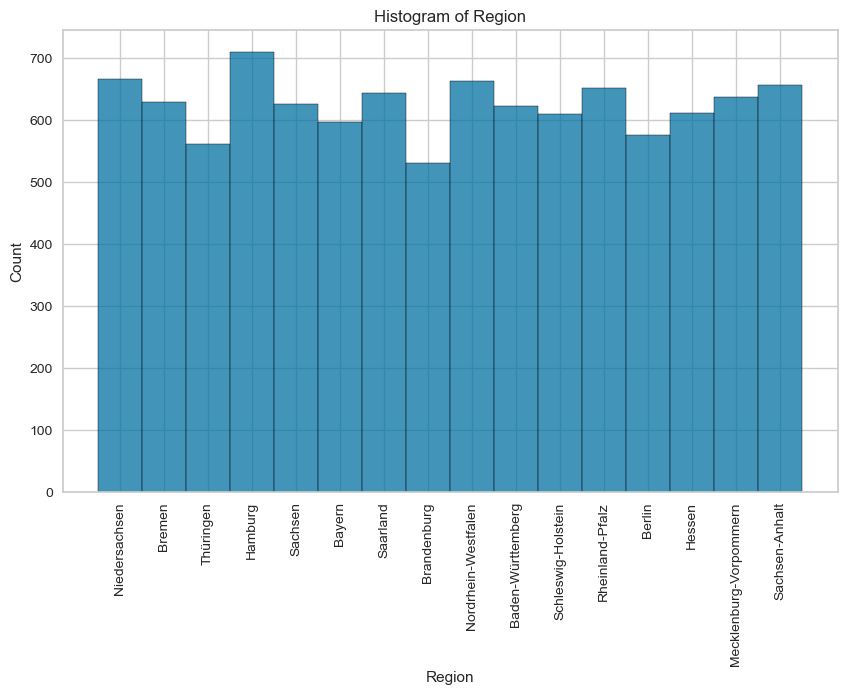

In [89]:
# Histogram for Region Columns
plt.figure(figsize=(10, 6))
sns.histplot(df['Region'])
plt.title('Histogram of Region')
plt.xticks(rotation=90)
plt.show()

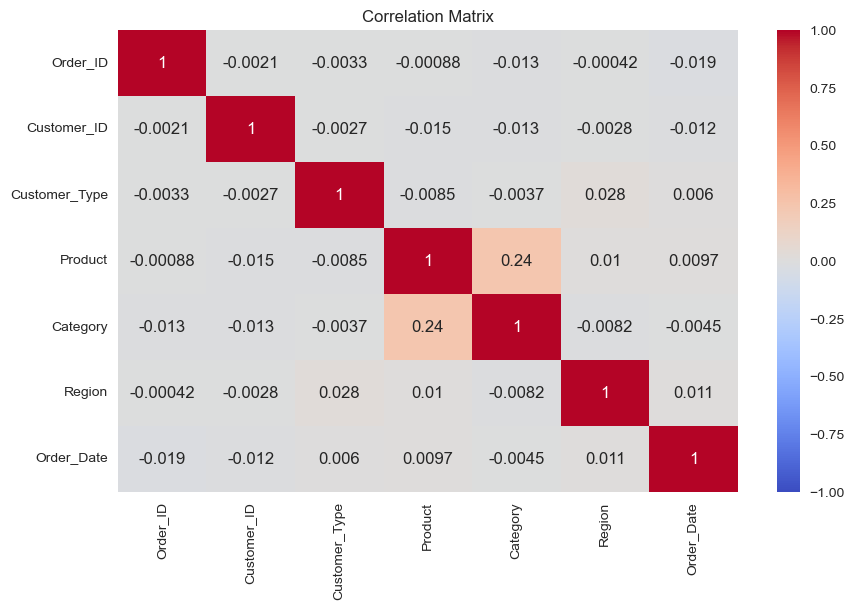

In [90]:
# Correlation Matrix
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
df_lencorder = pd.DataFrame()

for column in categorical_columns:
    df_lencorder[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df_lencorder.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

### Label Encoding

In [91]:
label_encoders = {}

category_features = df.select_dtypes(include=['object']).columns

for col in category_features:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

df

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,2510,2876,0,15,1,1.87,74,0.10,124.54,8,1062
1,3767,291,0,11,2,1.87,18,0.05,31.98,4,132
2,7608,3262,0,22,0,12.04,71,0.15,726.61,15,110
3,8496,4752,0,26,0,64.91,91,0.10,5316.13,5,234
4,4851,3640,1,13,1,1.64,4,0.00,6.56,12,653
...,...,...,...,...,...,...,...,...,...,...,...
9995,7993,2634,0,14,0,30.09,99,0.15,2532.07,13,792
9996,6742,4894,0,31,0,5.20,56,0.10,262.08,10,972
9997,9973,3234,1,11,2,2.05,14,0.00,28.70,2,659
9998,4905,4577,1,21,1,3.31,13,0.00,43.03,4,921


In [92]:
df = pd.DataFrame(df)

### Drop Uncorrelated Columns

In [93]:
df.nunique()

Order_ID         9994
Customer_ID      6315
Customer_Type       2
Product            47
Category            4
Unit_Price        928
Quantity          100
Discount            4
Total_Price      4269
Region             16
Order_Date       1094
dtype: int64

In [94]:
df = df.drop(['Order_ID', 'Customer_ID', 'Product', 'Total_Price', 'Order_Date'], axis=1)
df

,Customer_Type,Category,Unit_Price,Quantity,Discount,Region
0,0,1,1.87,74,0.10,8
1,0,2,1.87,18,0.05,4
2,0,0,12.04,71,0.15,15
3,0,0,64.91,91,0.10,5
4,1,1,1.64,4,0.00,12
...,...,...,...,...,...,...
9995,0,0,30.09,99,0.15,13
9996,0,0,5.20,56,0.10,10
9997,1,2,2.05,14,0.00,2
9998,1,1,3.31,13,0.00,4


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  10000 non-null  int32  
 1   Category       10000 non-null  int32  
 2   Unit_Price     10000 non-null  float64
 3   Quantity       10000 non-null  int64  
 4   Discount       10000 non-null  float64
 5   Region         10000 non-null  int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 351.7 KB


## Build Clustering Model

### Elbow Method

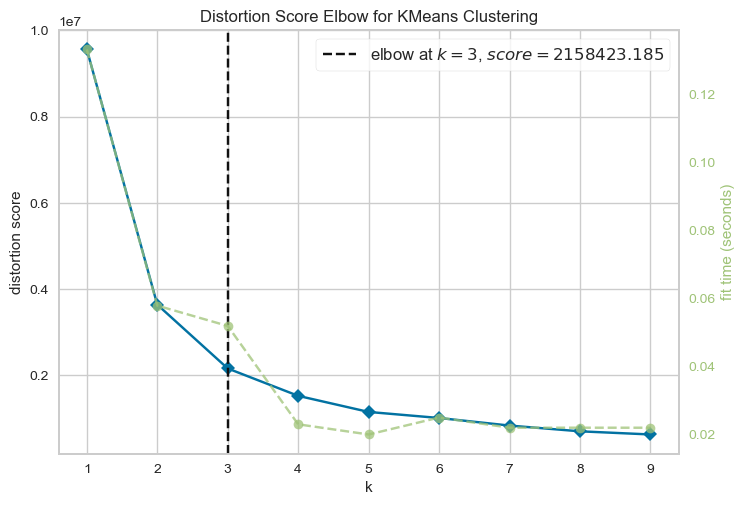

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
# Initialize the KMeans model without initial parameters
kmeans = KMeans()

# Initialize the KElbow visualizer to determine the optimal number of clusters.
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer to data to find the optimal number of clusters
visualizer.fit(df)

# Displays elbow graph for analysis
visualizer.show()

### Clustering with KMeans Algorithm

In [97]:
# Initialize and train the KMeans model with the number of clusters = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

# Get cluster labels
labels = kmeans.labels_

### Model Evaluation & Visualization

In [98]:
# Calculate Silhouette Score
score = silhouette_score(df, labels)

print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7165


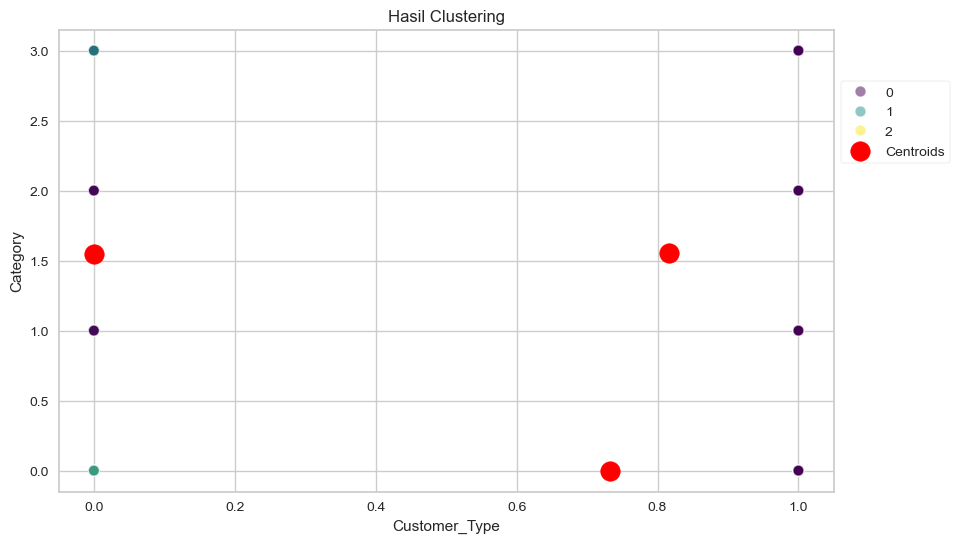

In [99]:
# visualization of results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, label='Centroids')
plt.title('Hasil Clustering')
plt.legend(frameon=True, loc="center left", bbox_to_anchor=(1, 0.8))
plt.show()

## Cluster Results Analysis and Interpretation

### Interpretasi Target

In [100]:
df['KMeans_Cluster'] = kmeans.labels_
df

,Customer_Type,Category,Unit_Price,Quantity,Discount,Region,KMeans_Cluster
0,0,1,1.87,74,0.10,8,1
1,0,2,1.87,18,0.05,4,0
2,0,0,12.04,71,0.15,15,1
3,0,0,64.91,91,0.10,5,1
4,1,1,1.64,4,0.00,12,0
...,...,...,...,...,...,...,...
9995,0,0,30.09,99,0.15,13,1
9996,0,0,5.20,56,0.10,10,1
9997,1,2,2.05,14,0.00,2,0
9998,1,1,3.31,13,0.00,4,0


### Inverse Data Label Encoding

In [101]:
df['Category'] = df['Category'].astype(int)
df['Category'] = label_encoders['Category'].inverse_transform(df['Category'])

df['Customer_Type'] = df['Customer_Type'].astype(int)
df['Customer_Type'] = label_encoders['Customer_Type'].inverse_transform(df['Customer_Type'])

df['Region'] = df['Region'].astype(int)
df['Region'] = label_encoders['Region'].inverse_transform(df['Region'])

df

,Customer_Type,Category,Unit_Price,Quantity,Discount,Region,KMeans_Cluster
0,B2B,Juices,1.87,74,0.10,Niedersachsen,1
1,B2B,Soft Drinks,1.87,18,0.05,Bremen,0
2,B2B,Alcoholic Beverages,12.04,71,0.15,Thüringen,1
3,B2B,Alcoholic Beverages,64.91,91,0.10,Hamburg,1
4,B2C,Juices,1.64,4,0.00,Sachsen,0
...,...,...,...,...,...,...,...
9995,B2B,Alcoholic Beverages,30.09,99,0.15,Sachsen-Anhalt,1
9996,B2B,Alcoholic Beverages,5.20,56,0.10,Rheinland-Pfalz,1
9997,B2C,Soft Drinks,2.05,14,0.00,Berlin,0
9998,B2C,Juices,3.31,13,0.00,Bremen,0


### Cluster Characteristics Analysis

In [108]:
# Functions for cluster characteristic analysis
k=3
def analyze_clusters(df, labels, k):
    print("Analysis of Characteristics of Each Cluster:")
    for cluster_id in range(k):
        # Fetching data for the current cluster
        cluster_data = df[labels == cluster_id]

        # Calculate the mean/mode for each feature in the cluster.
        Customer_Type = cluster_data.iloc[:, 0].mode()[0]  # Mode of Customer_Type
        Category = cluster_data.iloc[:, 1].mode()[0]  # Mean of Unit_Price
        Unit_Price = cluster_data.iloc[:, 2].mean()  # Mean of Unit_Price
        Quantity = cluster_data.iloc[:, 3].mean()  # Mean of Quantity
        Discount = cluster_data.iloc[:, 4].mean()  # Mean of Discount
        Region = cluster_data.iloc[:, 5].mode()[0]  # Mode of Region

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Mode of Customer_Type: {Customer_Type}")
        print(f"Mode of Category: {Category}")
        print(f"Mean of Unit_Price ($): {Unit_Price:.2f}")
        print(f"Mean of Quantity: {Quantity:.2f}")
        print(f"Mean of Discount (%): {Discount:.2f}")
        print(f"Mode of Region: {Region}")

# Analysis of Characteristics of Each Cluster
analyze_clusters(df, labels, k)

Analysis of Characteristics of Each Cluster:

Cluster 1:
Mode of Customer_Type: B2C
Mode of Category: Water
Mean of Unit_Price ($): 3.26
Mean of Quantity: 10.22
Mean of Discount (%): 0.01
Mode of Region: Niedersachsen

Cluster 2:
Mode of Customer_Type: B2B
Mode of Category: Water
Mean of Unit_Price ($): 4.82
Mean of Quantity: 69.96
Mean of Discount (%): 0.09
Mode of Region: Hamburg

Cluster 3:
Mode of Customer_Type: B2C
Mode of Category: Alcoholic Beverages
Mean of Unit_Price ($): 76.32
Mean of Quantity: 19.19
Mean of Discount (%): 0.02
Mode of Region: Hamburg


## Save Data to CSV

In [107]:
df.to_csv('dataset\Dataset_classification.csv')